# Customer segmentation(Clustering)

Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.

## Loading data

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  

market = pd.read_csv("marketing_campaign.csv", sep = "\t")
market.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
market.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [3]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Codebook can be seen at : https://www.kaggle.com/imakash3011/customer-personality-analysis

## Data cleaning and feature engineering

The next few steps, I want to

- Drop the na-valus
- Transfer some variables to usable features
- Reduce or simplify some features

In [4]:
##drop na values in income
market = market.dropna()
market.shape

(2216, 29)

In [5]:
#Dt_Customer
#conver to datetime
market["Dt_Customer"] = pd.to_datetime(market["Dt_Customer"], dayfirst = True)

#use the latest date as the present time
d1 = max(market["Dt_Customer"])

#list to store the days 
days = []
for date in market["Dt_Customer"]:
    day = d1 - date
    days.append(day.days)

market["Enrollment"] = days
market = market.drop("Dt_Customer", axis = 1)

market["Enrollment"][0:5]

0    663
1    113
2    312
3    139
4    161
Name: Enrollment, dtype: int64

In [6]:
#Year_Birth
market["Age"] = 2021 - market["Year_Birth"]
market = market.drop("Year_Birth", axis = 1)

market["Age"][0:5]

0    64
1    67
2    56
3    37
4    40
Name: Age, dtype: int64

In [7]:
#Education
market["Education"].value_counts()

market["Education"] = market["Education"].replace({"Basic" : "Undergraduate", "2n Cycle" : "Undergraduate",
    "Graduation" : "Graduate", "Master" : "Postgraduate", "PhD" : "Postgraduate"})

market["Education"][0:5]

0        Graduate
1        Graduate
2        Graduate
3        Graduate
4    Postgraduate
Name: Education, dtype: object

In [8]:
#Marital_Status
market["Marital_Status"].value_counts()

market["Marital"]=market["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", 
    "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
market = market.drop("Marital_Status", axis = 1)

market["Marital"][0:5]

0      Alone
1      Alone
2    Partner
3    Partner
4    Partner
Name: Marital, dtype: object

In [9]:
#Teenhome and Kidhome = Children
market["Children"] = market["Teenhome"] + market["Kidhome"]
market["Children"][0:5]

#can also calculate the family size
market["Family_Size"] = market["Marital"].replace({"Alone" : 1, "Partner" : 2}) + market["Children"]
market["Family_Size"][0:5]

0    1
1    3
2    2
3    3
4    3
Name: Family_Size, dtype: int64

In [10]:
#Total Spent
market["Spent"] = market["MntWines"]+ market["MntFruits"]+ market["MntMeatProducts"] 
+ market["MntFishProducts"]+ market["MntSweetProducts"]+ market["MntGoldProds"]
    
market["Spent"][0:5]

0    1269
1      18
2     602
3      35
4     334
Name: Spent, dtype: int64

In [11]:
#rename for short
market = market.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [12]:
#drop unnecessary feature
market = market.drop(["ID", "Z_CostContact", "Z_Revenue"], axis = 1)

#overview
market.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Enrollment,Age,Marital,Children,Family_Size,Spent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,663,64,Alone,0,1,1269
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,113,67,Alone,2,3,18
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,312,56,Partner,0,2,602
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,139,37,Partner,1,3,35
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,161,40,Partner,1,3,334


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

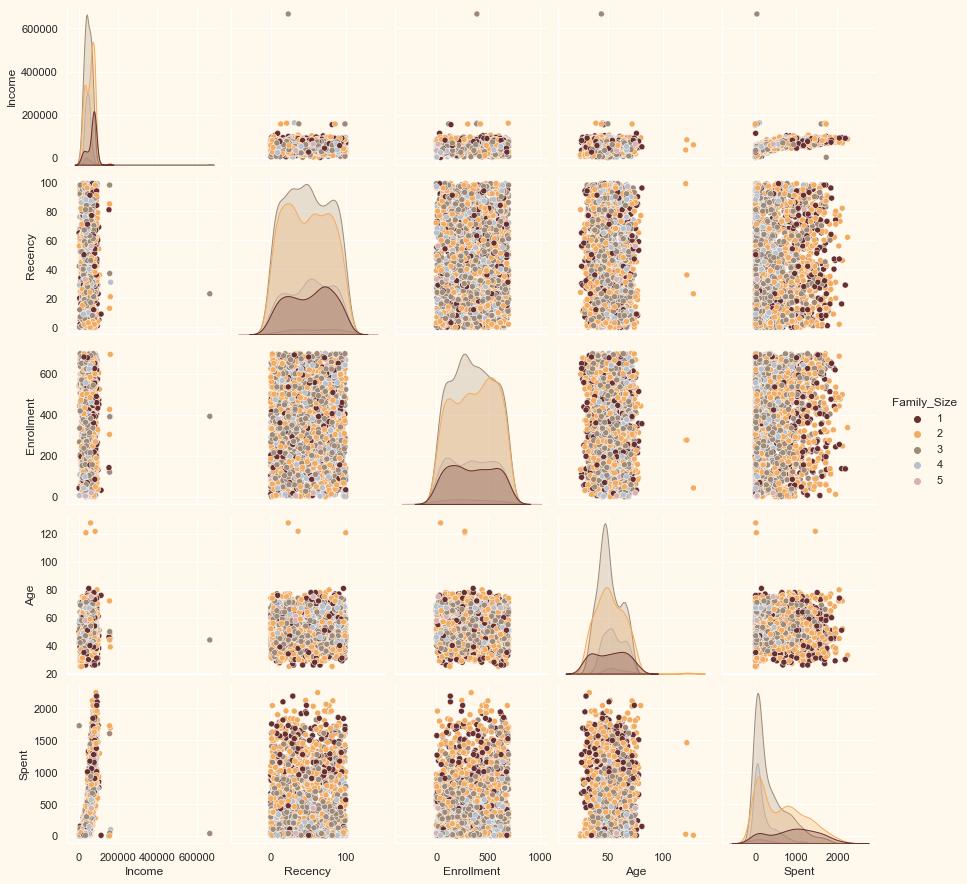

In [13]:
## plot
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#Plotting following features
To_Plot = [ "Income", "Recency", "Enrollment", "Age", "Spent", "Family_Size"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(market[To_Plot], hue= "Family_Size",palette= ["#682F2F","#F3AB60", "#9F8A78", "#B9C0C9", "#D6B2B1"])
#Taking hue 
plt.show()

In [14]:
#outliers
market = market[(market["Income"] < 6e5)]
market = market[(market["Age"] < 100)]
market.shape

(2212, 29)

## Preprocessing

Next things :

- Encode the catogorical features
- Scale the features
- Reduce the features

In [15]:
from sklearn import preprocessing

#encode
encoder = preprocessing.LabelEncoder()
market["Education"] = encoder.fit_transform(market["Education"])
market["Marital"] = encoder.fit_transform(market["Marital"])

#scale
#drop the features related to promotion and campaign
scaler =preprocessing.StandardScaler()
drops = ["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response"]
market2 = market.drop(drops, axis = 1)

scaler.fit(market2)
market2 = pd.DataFrame(scaler.transform(market2), columns = market2.columns)

market2.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Enrollment,Age,Marital,Children,Family_Size,Spent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,1.426865,2.503607,-0.555814,0.692181,1.527721,1.018352,-1.349603,-1.264598,-1.758359,1.478249
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-1.126420,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-1.349603,1.404572,0.449070,-0.922325
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,1.426865,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.740959,-1.264598,-0.654644,0.198327
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.761665,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,0.740959,0.069987,0.449070,-0.889703
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.332600,0.111982,0.059532,-0.132545,-0.951915,-1.033114,0.740959,0.069987,0.449070,-0.315945


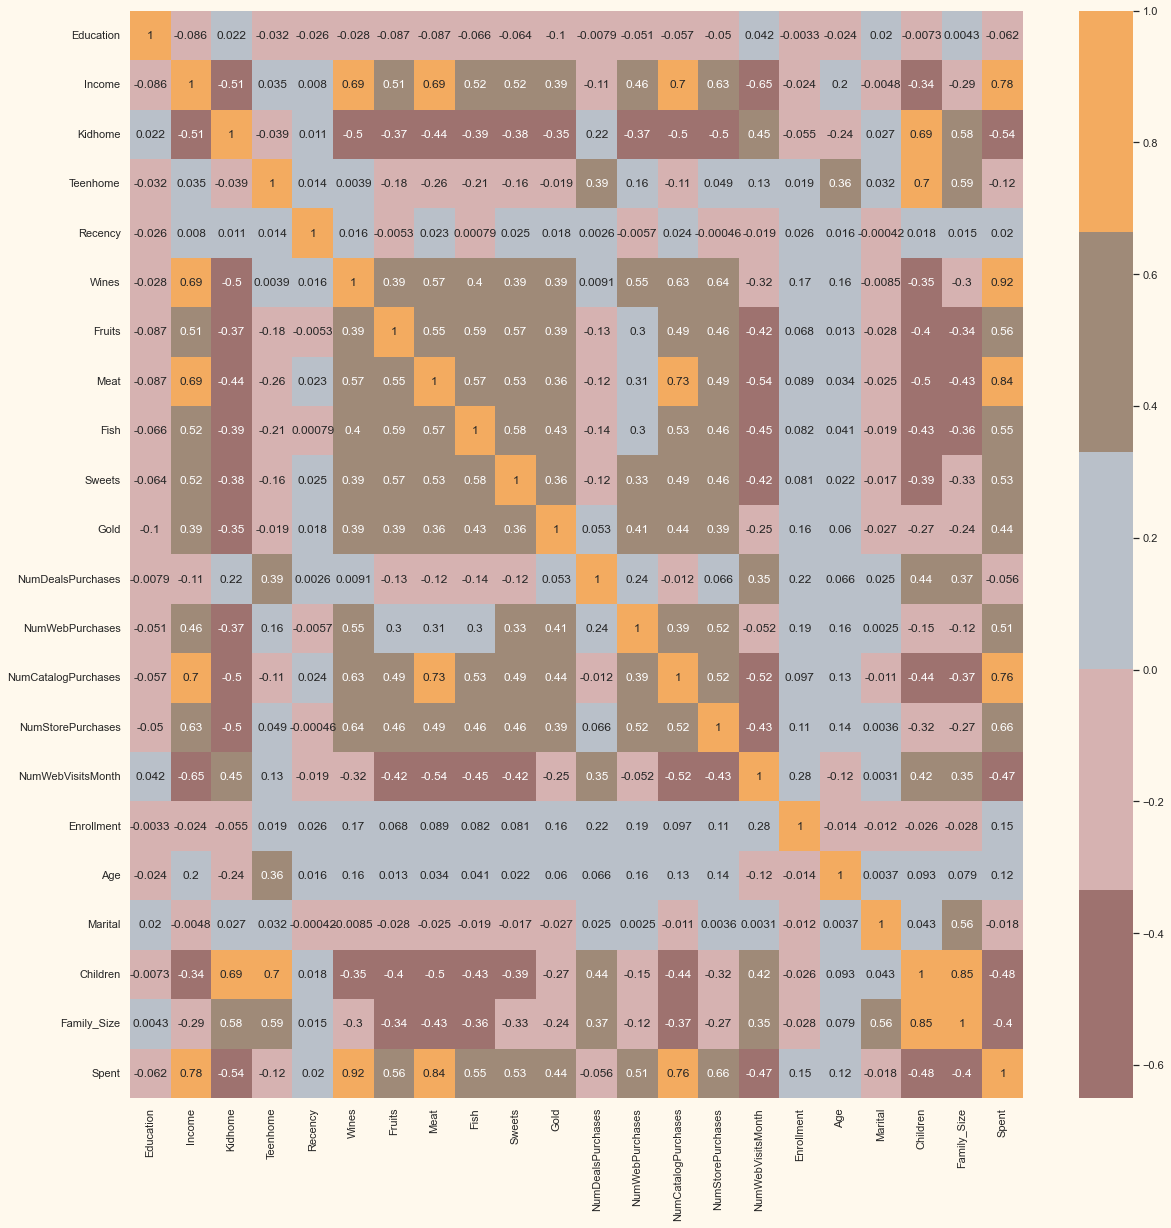

In [16]:
# featrue reducing

#correlation matrix
corrmat= market2.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)
plt.show()

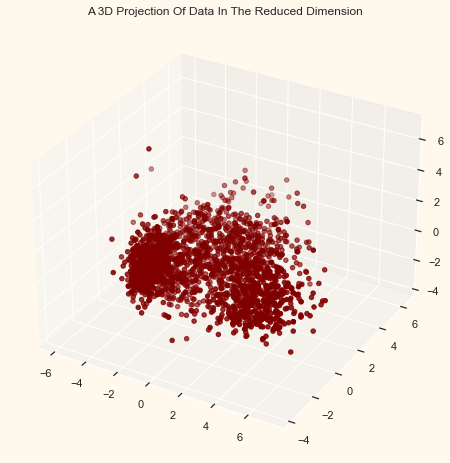

In [17]:
#PCA to do dimension reduction
from sklearn.decomposition import PCA


pca = PCA(n_components = 3)
market3 = pd.DataFrame(pca.fit(market2).transform(market2), columns = ["var1", "var2", "var3"])

#plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(market3["var1"], market3["var2"], market3["var3"], c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## CLUSTERING

Next few stpes to cluster the data

- Use Elbow Method to detemine the number of clusters
- Cluster via Agglomerative Clustering
- Examine the clusters via scatterplot

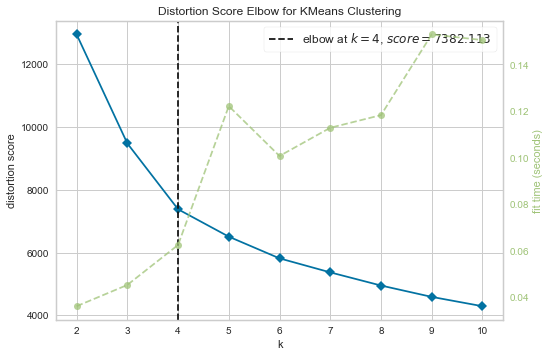

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Elbow Method
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

elbow = KElbowVisualizer(KMeans(), k =10)
elbow.fit(market3)
elbow.show()

The above plot indicates that **4** will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

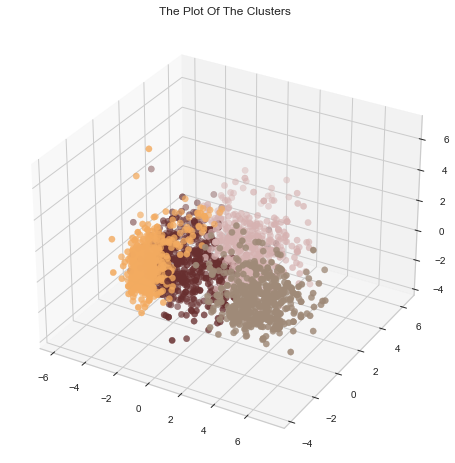

In [19]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 4)
y_hat = cluster.fit_predict(market3)
market3["Cluster"] = y_hat
market["Cluster"] = y_hat

#plot
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(market3["var1"], market3["var2"], market3["var3"], s=40, c=market3["Cluster"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [20]:
market.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Enrollment,Age,Marital,Children,Family_Size,Spent,Cluster
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,663,64,0,0,1,1269,2
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,113,67,0,2,3,18,0
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,312,56,1,0,2,602,2
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,139,37,1,1,3,35,3
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,161,40,1,1,3,334,0


## Evaluating Models

As for unsupervised clustering, there is no tag for us to calculate some matrics, or score to evaluate the model, we will study the patterns in the clusters formed and determine the nature of the clusters' patterns.

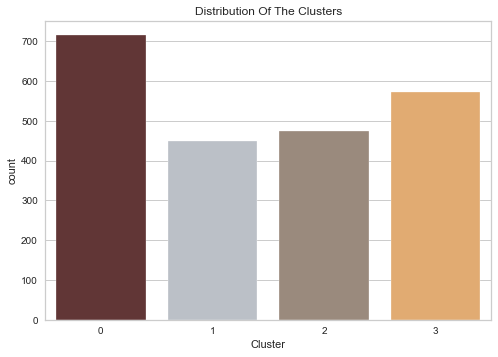

In [21]:
#plot the cluster distribution
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=market["Cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

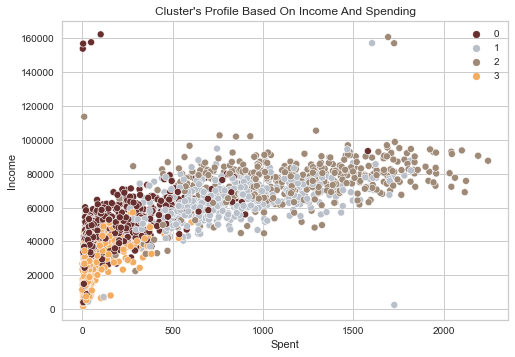

In [22]:
#income and spent

pl = sns.scatterplot(data = market, x=market["Spent"], y=market["Income"],hue=market["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

From the scatterplot above, we can conclude the folloing cluster patttern:

- group 0 : average income, low spending
- group 1 : average income, high spending
- group 2 : high income, high spending
- group 3 : low income, low spending

Next we can explore how the past promotions worked on these four groups.

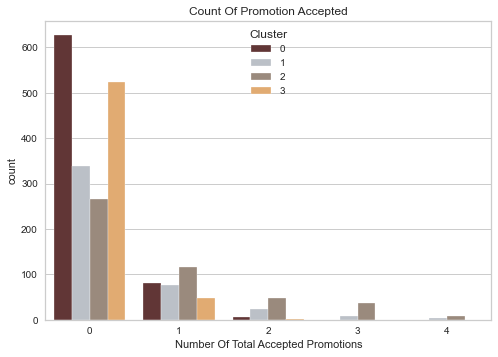

In [27]:
#Creating a feature to get a sum of accepted promotions 
market["Total_Promos"] = market["AcceptedCmp1"]+ market["AcceptedCmp2"]+ market["AcceptedCmp3"]+ market["AcceptedCmp4"]+ market["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=market["Total_Promos"],hue=market["Cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

We can conclude that the promotion didn't work well as most of the customers refused the promotion and maybe some more precise customer oriented promotion needed to be done.

<Figure size 576x396 with 0 Axes>

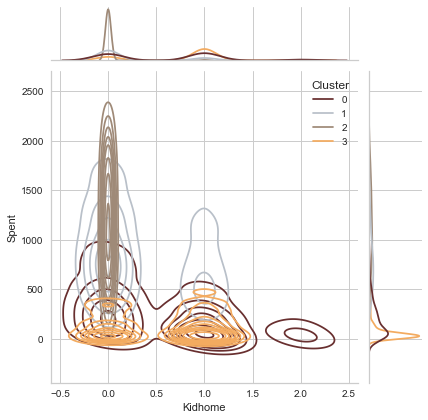

<Figure size 576x396 with 0 Axes>

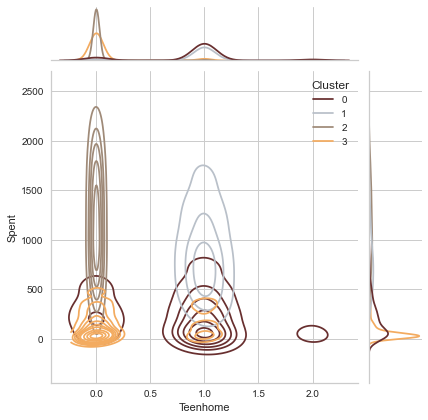

<Figure size 576x396 with 0 Axes>

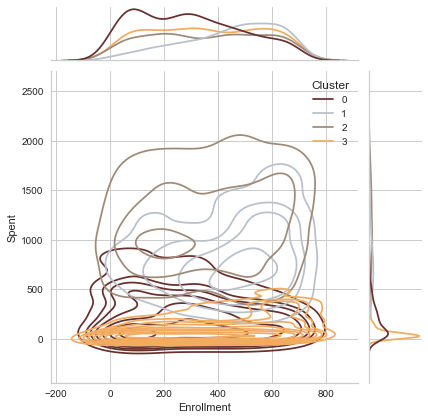

<Figure size 576x396 with 0 Axes>

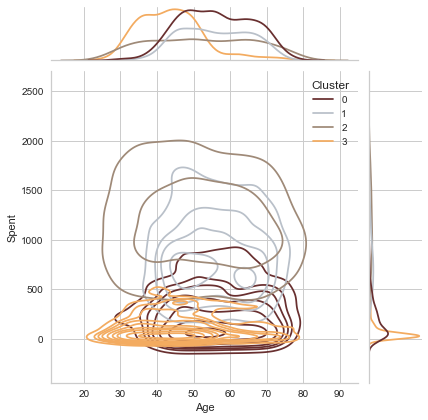

<Figure size 576x396 with 0 Axes>

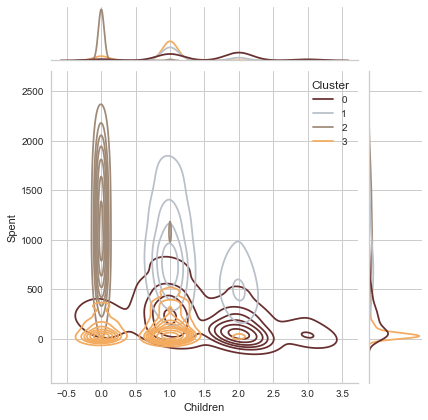

<Figure size 576x396 with 0 Axes>

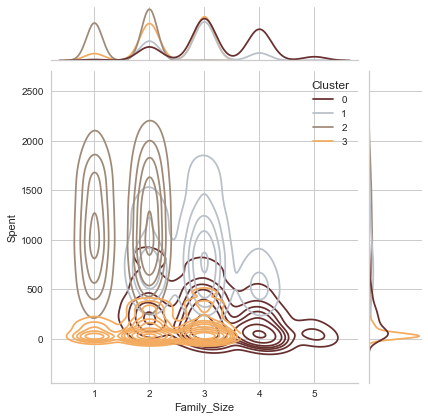

<Figure size 576x396 with 0 Axes>

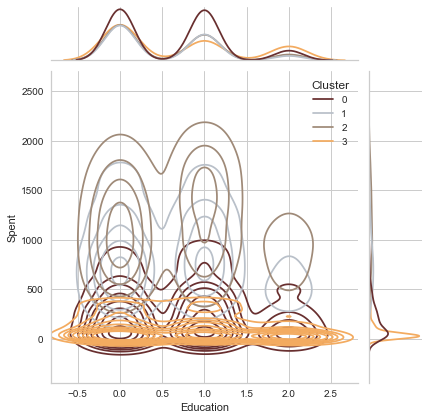

In [32]:
Personal = [ "Kidhome","Teenhome","Enrollment", "Age", "Children", "Family_Size", "Education"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=market[i], y=market["Spent"], hue =market["Cluster"], kind="kde", palette=pal)
    plt.show()